In [1]:
import pandas as pd
from torchtext.data import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
import matplotlib.pyplot as plt

In [2]:
ls "../data/all_reviews/"

 Volume in drive C is OS
 Volume Serial Number is BC2E-9B50

 Directory of C:\dev\steam-review-sentiment\data\all_reviews

12/01/2024  21.55    <DIR>          .
16/01/2024  12.35    <DIR>          ..
10/12/2023  19.55    42ÿ487ÿ005ÿ552 all_reviews.csv
12/01/2024  22.47    13ÿ534ÿ026ÿ394 all_reviews_english.csv
               2 File(s) 56ÿ021ÿ031ÿ946 bytes
               2 Dir(s)  70ÿ433ÿ435ÿ648 bytes free


In [21]:
# Process the data to only contain english language
filename = "../data/all_reviews/all_reviews.csv"
filename_output = "../data/all_reviews/all_reviews_english_balanced.csv"
chunksize = 10 ** 4
with pd.read_csv(filename, chunksize=chunksize) as reader:
    first_chunk = True
    for chunk in reader:
        chunk_eng = chunk[chunk["language"] == "english"][["review", "voted_up"]]
        len_down = len(chunk_eng[chunk_eng["voted_up"] == 0])
        chunk_eng_bal = chunk_eng.sort_values("voted_up")[:len_down * 2]
        if first_chunk:
            chunk_eng_bal.to_csv(filename_output)
            first_chunk = False
        else:
            chunk_eng_bal.to_csv(filename_output, mode='a', header=False)

In [23]:
# Read a chunk of data for exploration
filename = "../data/all_reviews/all_reviews_english_balanced.csv"
chunksize = 10 ** 4
with pd.read_csv(filename, chunksize=chunksize) as reader:
    for chunk in reader:
        reviews = chunk
        break

In [24]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   review      10000 non-null  object
 2   voted_up    10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


<BarContainer object of 2 artists>

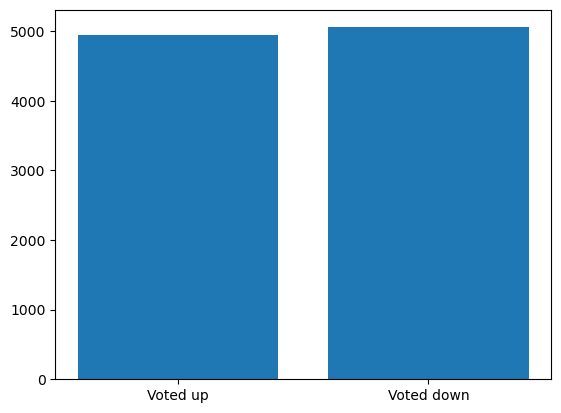

In [25]:
voted_up = sum(reviews["voted_up"] == 1)
voted_down = sum(reviews["voted_up"] == 0)
plt.bar(["Voted up", "Voted down"], [voted_up, voted_down])

In [7]:
# Test word tokenizer
tokenizer = get_tokenizer("basic_english")
review_159 = reviews["review"].iloc[159]
tokenizer(review_159.lower())

['i',
 'can',
 'understand',
 'why',
 'this',
 'game',
 'was',
 'a',
 'smash',
 'hit',
 'but',
 'seriously',
 'doesn',
 "'",
 't',
 'hold',
 'up',
 'in',
 'today',
 "'",
 's',
 'time',
 '.',
 'all',
 'the',
 '1',
 '.',
 '6',
 'fanboys',
 'are',
 'the',
 'ones',
 'who',
 'grew',
 'up',
 'playing',
 'it',
 'and',
 'hence',
 'holding',
 'onto',
 'their',
 'sweet',
 'childhood',
 'memory',
 '.',
 'nothing',
 'wrong',
 'with',
 'that',
 '.',
 'i',
 'was',
 'introduced',
 'to',
 'the',
 'world',
 'of',
 'counter',
 'strike',
 'with',
 'cs',
 'go',
 '.',
 '1',
 '.',
 '6',
 'seriously',
 'doesn',
 "'",
 't',
 'hold',
 'up',
 'in',
 'front',
 'of',
 'cs',
 'go',
 'and',
 'i',
 'am',
 'not',
 'talking',
 'about',
 'graphics',
 'but',
 'multiplayer',
 '(',
 'i',
 'am',
 'not',
 'the',
 'one',
 'who',
 'says',
 'a',
 'game',
 'is',
 'bad',
 'because',
 'of',
 'old',
 'graphics',
 'as',
 'i',
 'still',
 'love',
 'playing',
 'half-life',
 'and',
 'gta',
 '3',
 'from',
 'time',
 'to',
 'time',
 ',',


In [8]:
# Test vocabulary building
def build_vocab(reviews):
    for text in reviews["review"]:
        yield tokenizer(text)
vocab = build_vocab_from_iterator(build_vocab(reviews), max_tokens=100000, specials=["<UNK>"])
vocab.set_default_index(vocab["<UNK>"])

In [19]:
len(vocab)

1188

In [10]:
def append_with_frequency(dict, tokens):
    for t in tokens:
        if t in dict.keys():
            dict[t] += 1
        else:
            dict[t] = 1

tokens = {}
for r in reviews["review"]:
    try:
        t = tokenizer(r.lower())
        append_with_frequency(tokens, t)
    except:
        pass

In [11]:
len(tokens)

12348

In [12]:
tokens

{'goat': 55,
 'game': 4060,
 '!': 1840,
 'first': 181,
 'crush': 1,
 '.': 7351,
 'always': 136,
 'in': 1183,
 'my': 954,
 'heart': 25,
 'best': 1153,
 'version': 84,
 'of': 1812,
 'cs': 670,
 'ever': 563,
 ',': 3957,
 'history': 55,
 'a': 2278,
 'everyone': 60,
 'needs': 16,
 'but': 785,
 'not': 417,
 'to': 1980,
 'play': 621,
 'old': 840,
 'gold': 212,
 'y': 62,
 'cs2': 56,
 'update': 17,
 'made': 170,
 'the': 3708,
 'barely': 2,
 'playable': 27,
 'on': 586,
 'laptop': 15,
 'decided': 17,
 'give': 45,
 'good': 1386,
 'classics': 14,
 'try': 51,
 'had': 195,
 'this': 1843,
 'library': 16,
 'for': 1015,
 'while': 71,
 'is': 1477,
 'nearly': 12,
 'impossible': 9,
 '2023': 26,
 'due': 14,
 'most': 141,
 'community': 131,
 'servers': 187,
 'being': 51,
 'cesspool': 1,
 'ugly': 5,
 'visually': 2,
 'distracting': 1,
 'customization': 4,
 'that': 860,
 'shits': 3,
 'original': 45,
 "'": 1745,
 's': 781,
 'solid': 17,
 'half-life': 46,
 'low': 25,
 'poly': 1,
 'aesthetics': 2,
 'power': 6,
 'c

In [ ]:
# Read part of data to create dict of token frequency
filename = "../data/all_reviews/all_reviews_english.csv"
chunksize = 10 ** 4
process_freq = 10
with pd.read_csv(filename, chunksize=chunksize) as reader:
    tokens = {}
    i = 0
    for chunk in reader:
        i += 1
        if i % process_freq != 0:
            continue
        for r in chunk["review"]:
            try:
                t = tokenizer(r.lower())
                append_with_frequency(tokens, t)
            except:
                pass

In [ ]:
len(vocab)

In [27]:
# Select 1000 and 10000 most frequent tokens and store into files
filename_1k = "../data/tokens_list_1k.csv"
filename_10k = "../data/tokens_list_10k.csv"
tokens_sorted = sorted(tokens.items(), key=lambda item: item[1], reverse=True)
tokens_list_1k = pd.DataFrame(tokens_sorted[:1000], columns=["token", "frequency"])
tokens_list_10k = pd.DataFrame(tokens_sorted[:10000], columns=["token", "frequency"])
tokens_list_1k.to_csv(filename_1k)
tokens_list_10k.to_csv(filename_10k)